# ***EXPLORATORY DATA ANALYSIS(EDA) OF HABERMANS SURVIVAL DATA***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import robust 

In [ ]:
haber = pd.read_csv("haberman.csv")

In [ ]:
haber.head()

,Age,Op_Year,axil_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [ ]:
haber.columns

Index(['Age', 'Op_Year', 'axil_nodes', 'Surv_status'], dtype='object')

In [ ]:
haber["Surv_status"].unique()

array([1, 2])

In [ ]:
haber["Surv_status"].value_counts()

1    225
2     81
Name: Surv_status, dtype: int64

In [ ]:
haber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          306 non-null    int64
 1   Op_Year      306 non-null    int64
 2   axil_nodes   306 non-null    int64
 3   Surv_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [ ]:
haber["Surv_status"]=haber["Surv_status"].map({1:"yes - survived", 2:"no - not survived"})

In [ ]:
haber.head()

,Age,Op_Year,axil_nodes,Surv_status
0,30,64,1,yes - survived
1,30,62,3,yes - survived
2,30,65,0,yes - survived
3,31,59,2,yes - survived
4,31,65,4,yes - survived


**OBSERVATIONS:**

1.   The haberman's dataset is a unbalanced dataset
2.   There are no missing values in the dataset and all data types are integer numbers.
3.  The data type of Surv_status in integer and they are made to categorical value

       yes = "1" which means the patient has survived 5 years or longer.

       no = "2" which means the patient died within 5 years.


       



In [ ]:
haber.describe()

,Age,Op_Year,axil_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


**OBSERVATIONS:**

1. The Habermans dataset is a UNBALANCED DATASET
2. Count: Total number of values present in each column
3. Mean : Is the mean of respective columns
4. Std : Is the standard deviation of respective columns
5. Min :Is the minimum value of respective columns
6. Max : Is the maximum value of respective columns
7. 25% : Gives the 25th percentile value of respective columns
8. 50% : Gives the 50th percentile value of respective columns
9. 75%: Gives the 75th percentile value of respective columns




# **BIVARIATE ANALYSIS**

In [ ]:
haber.head()

,Age,Op_Year,axil_nodes,Surv_status
0,30,64,1,yes - survived
1,30,62,3,yes - survived
2,30,65,0,yes - survived
3,31,59,2,yes - survived
4,31,65,4,yes - survived


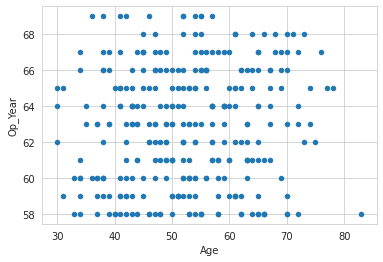

In [ ]:
sns.set_style("whitegrid")
haber.plot(kind = "scatter", x = "Age", y ="Op_Year")

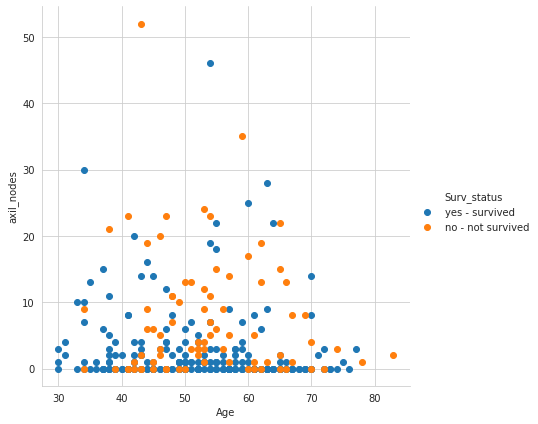

In [ ]:
sns.set_style("whitegrid")
g = sns.FacetGrid(haber, hue = "Surv_status", height = 6)
g.map(plt.scatter, "Age", "axil_nodes")
g.add_legend()
plt.show()

**OBSERVATIONS:**
1. More number of people have nodes between 0 and 10.
2. There are fewer number of people who have nodes greater than 25.
3. More number of people between the age groups 50 and 60 survived with nodes between 0 and 10.







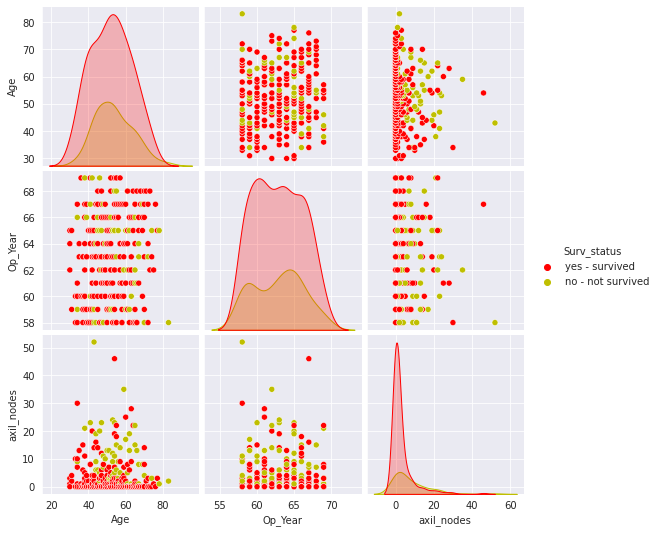

In [ ]:
sns.set_style("darkgrid")
sns.pairplot(haber, hue = "Surv_status",palette=["r","y"])

**OBSERVATIONS:**

1.   There are much overlapping among all the pairplots.
2.   These features are not sufficient to classify people to the categories who survied or not, based on the number of nodes.



# **CONTOUR PLOTS**

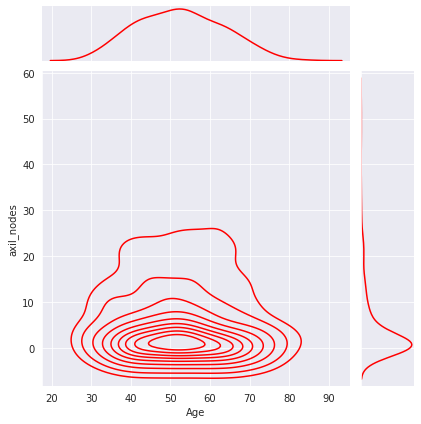

In [ ]:
sns.set_style("darkgrid")
sns.jointplot(x = "Age", y = "axil_nodes", data = haber, kind = "kde",color = "red")



**OBSERVATION:**

1. More number of people have nodes between 0 and 10




# **UNIVARIATE ANALYSIS**

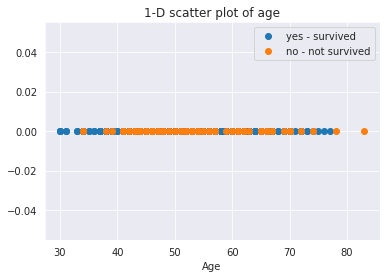

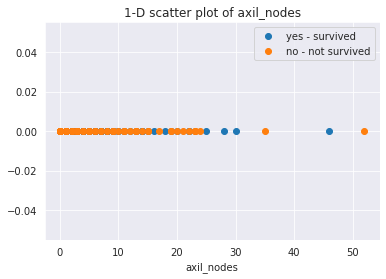

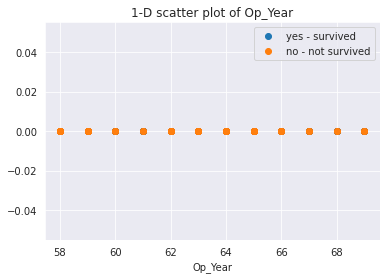

In [ ]:
haber_yes = haber.loc[haber["Surv_status"] == "yes - survived"]
haber_no = haber.loc[haber["Surv_status"] == "no - not survived"]
#1-D plot of age
plt.plot(haber_yes["Age"], np.zeros_like(haber_yes["Age"]), "o",)
plt.plot(haber_no["Age"], np.zeros_like(haber_no["Age"]), "o")
plt.xlabel("Age")
plt.title("1-D scatter plot of age")
plt.legend( ["yes - survived","no - not survived"])
plt.show()

#1-D plot of axil_nodes
plt.plot(haber_yes["axil_nodes"], np.zeros_like(haber_yes["axil_nodes"]), "o")
plt.plot(haber_no["axil_nodes"], np.zeros_like(haber_no["axil_nodes"]), "o")
plt.xlabel("axil_nodes")
plt.title("1-D scatter plot of axil_nodes")
plt.legend( ["yes - survived","no - not survived"])
plt.show()

#1-D plot of Op_Year
plt.plot(haber_yes["Op_Year"], np.zeros_like(haber_yes["Op_Year"]), "o")
plt.plot(haber_no["Op_Year"], np.zeros_like(haber_no["Op_Year"]), "o")
plt.xlabel("Op_Year")
plt.title("1-D scatter plot of Op_Year")
plt.legend( ["yes - survived","no - not survived"])
plt.show()





/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


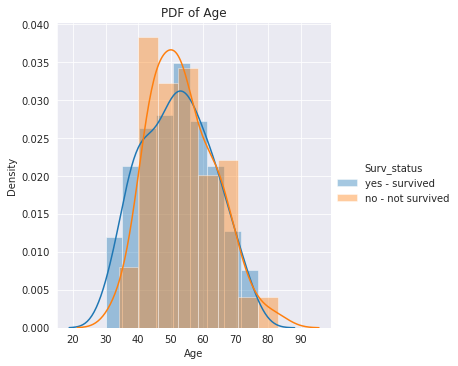

In [ ]:
sns.set_style("darkgrid")
g = sns.FacetGrid(data = haber, hue = "Surv_status", size = 5)
g.map(sns.distplot, "Age")
plt.title("PDF of Age")
g.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'PDF of Op_year')

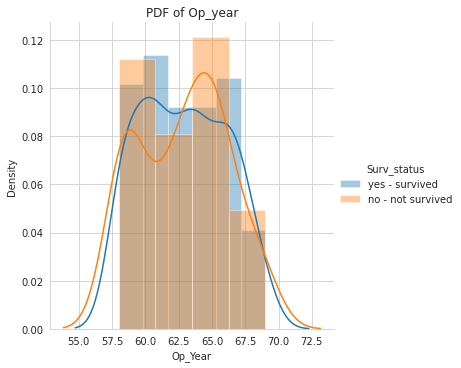

In [ ]:
sns.set_style("whitegrid")
g = sns.FacetGrid(haber,hue= "Surv_status", height=5)
g.map(sns.distplot, "Op_Year")
g.add_legend()
plt.title("PDF of Op_year")
                  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'PDF of axil_nodes')

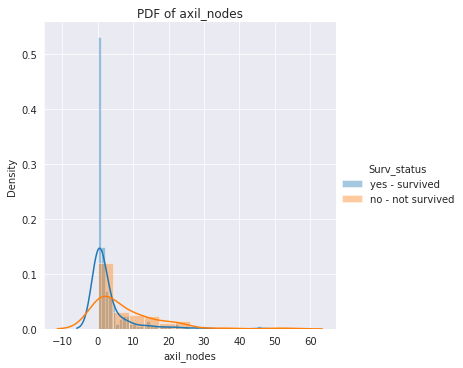

In [ ]:
sns.set_style("darkgrid")
g = sns.FacetGrid(haber, hue = "Surv_status", height = 5)
g.map(sns.distplot, "axil_nodes")
g.add_legend()
plt.title("PDF of axil_nodes")


Text(0.5, 1.0, 'PDF of axil_nodes')

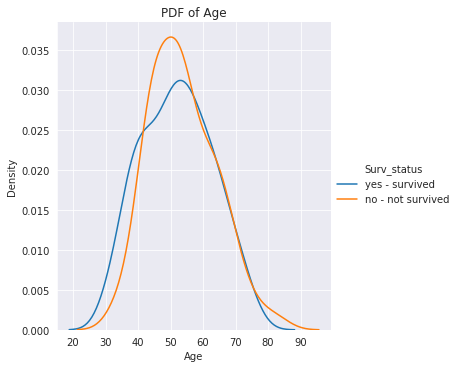

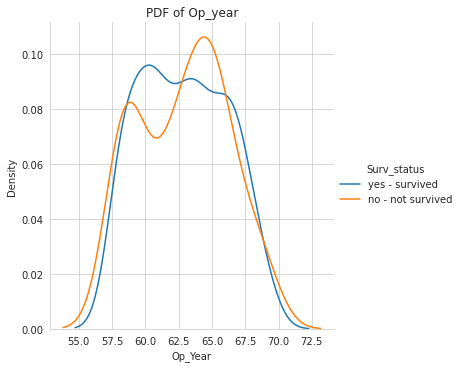

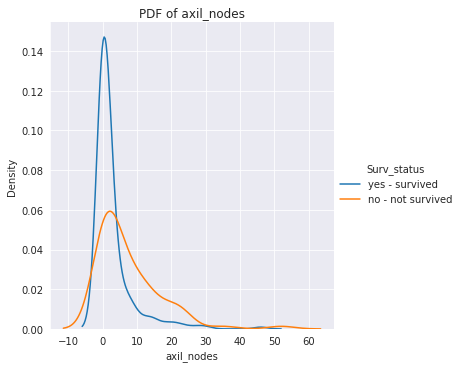

In [ ]:
sns.set_style("darkgrid")
g = sns.FacetGrid(data = haber, hue = "Surv_status", height = 5)
g.map(sns.kdeplot, "Age")
plt.title("PDF of Age")
g.add_legend()


sns.set_style("whitegrid")
g = sns.FacetGrid(haber,hue= "Surv_status", height=5)
g.map(sns.kdeplot, "Op_Year")
g.add_legend()
plt.title("PDF of Op_year")


sns.set_style("darkgrid")
g = sns.FacetGrid(haber, hue = "Surv_status", height = 5)
g.map(sns.kdeplot, "axil_nodes")
g.add_legend()
plt.title("PDF of axil_nodes")








OBSERVATIONS:


1. From the above plots we can observe that PDF of Age and Op_Year are overlapped.
2. There are only about 6% percentage of people died with the nodes number between 0 and 10 and about more than 14% of people survives 5 years or longer with the same node range.





# **CDF**

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


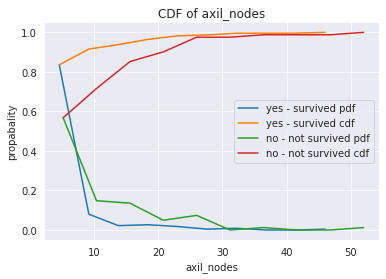

In [ ]:
counts, bin_edges = np.histogram(haber_yes["axil_nodes"], bins = 10, density = True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


counts, bin_edges = np.histogram(haber_no["axil_nodes"], bins = 10, density = True)
pdf = counts/sum(counts)
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.xlabel("axil_nodes")
plt.ylabel("propabality")
plt.title("CDF of axil_nodes")
plt.legend(["yes - survived pdf","yes - survived cdf","no - not survived pdf","no - not survived cdf"],loc = 0)



**OBSERVATIONS:**


1.   PDF and CDF of both Sur_status are overlapped.
2.   We can conclude that CDF's of nodes > age > year



# **Box plots**

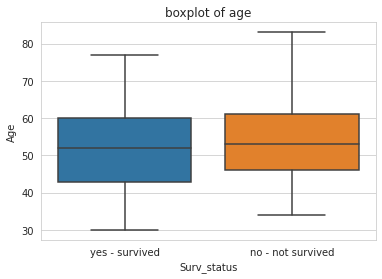

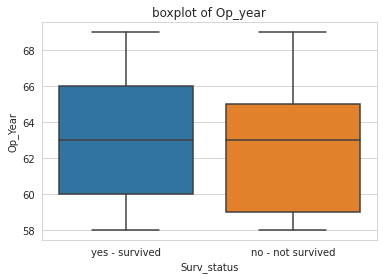

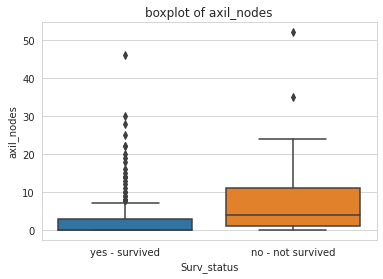

In [ ]:
sns.set_style("whitegrid")
sns.boxplot(x = "Surv_status", y = "Age", data = haber)
plt.title("boxplot of age")
plt.show()
sns.boxplot(x = "Surv_status", y = "Op_Year", data = haber)
plt.title("boxplot of Op_year")
plt.show()
sns.boxplot(x = "Surv_status", y = "axil_nodes", data = haber)
plt.title("boxplot of axil_nodes")
plt.show()

**OBSERVATIONS:**


1. There is almost > 95% error in estimation
2. The year plot is almost worse than age 
3. The boxplot of axil_nodes say that there is < 65% error
in the estimation


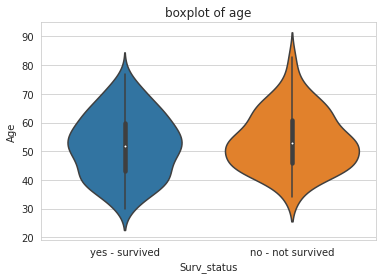

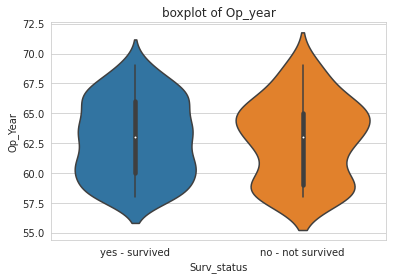

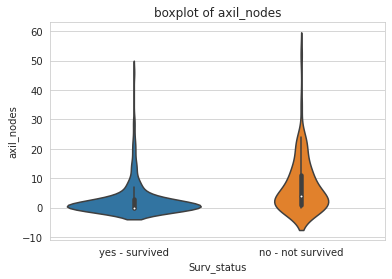

In [ ]:
sns.set_style("whitegrid")
sns.violinplot(x = "Surv_status", y = "Age", data = haber)
plt.title("boxplot of age")
plt.show()
sns.violinplot(x = "Surv_status", y = "Op_Year", data = haber)
plt.title("boxplot of Op_year")
plt.show()
sns.violinplot(x = "Surv_status", y = "axil_nodes", data = haber)
plt.title("boxplot of axil_nodes")
plt.show()